# LEAD SCORING CASE STUDY

In [1]:
# FILTER WARNINGS
import warnings
warnings.filterwarnings('ignore')

In [2]:
# IMPORT NECESSARY LIBRARIES
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

# Step 1 - Load the data

In [3]:
# Load the data
leads = pd.read_csv('Leads.csv')

# Check the head of the data
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


# Step 2 - Inspecting the dataframe

In [4]:
# Check the dimension of the data
leads.shape

(9240, 37)

In [5]:
# Check the statistical aspects of the dataframe
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
# Check the type of the columns
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

# Step 3 - Data Cleaning & Data Processing

In [7]:
# Converting Yes/No to 0/1
varlist = ['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement','Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview']

def binary_map(x):
    return x.map({'Yes': 1, 'No': 0})

leads[varlist] = leads[varlist].apply(binary_map)

In [8]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,0,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,NaN,0,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,Select,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Select,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified


In [9]:
# Let's remove the redundant or unwanted columns - Prospect Id and Lead Number

leads.drop(['Prospect ID', 'Lead Number'], axis=1, inplace=True)

In [10]:
# Check the head again
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,0,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,NaN,0,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,Select,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Select,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified


### Identify and handle Null values

In [11]:
# Convert the 'select' value to NaN as it specifies that user did not select an option

leads = leads.replace('Select', np.nan)
leads = leads.replace('select', np.nan)

In [12]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,0,0,NaN,NaN,02.Medium,02.Medium,15.0,15.0,0,0,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,NaN,0,0,NaN,NaN,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,NaN,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,NaN,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified


In [13]:
# Check for Null values in the columns

leads.isna().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [14]:
# Check the percentage of Null values in each column

round(100 * leads.isnull().sum() / len(leads.index),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [15]:
# As per standards, let's remove the columns with more than 35% Null values
for i in leads.columns:
    if (round(100 * leads[i].isnull().sum() / len(leads[i].index),2) >= 35):
        leads.drop(i, axis=1, inplace=True)

In [16]:
# Check the percentage of Null values in each column again

round(100 * leads.isnull().sum() / len(leads.index),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

## Inspect categorical columns with Yes/No values

In [17]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,0,0,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,0,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Student,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,0,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,0,0,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,0,0,Modified


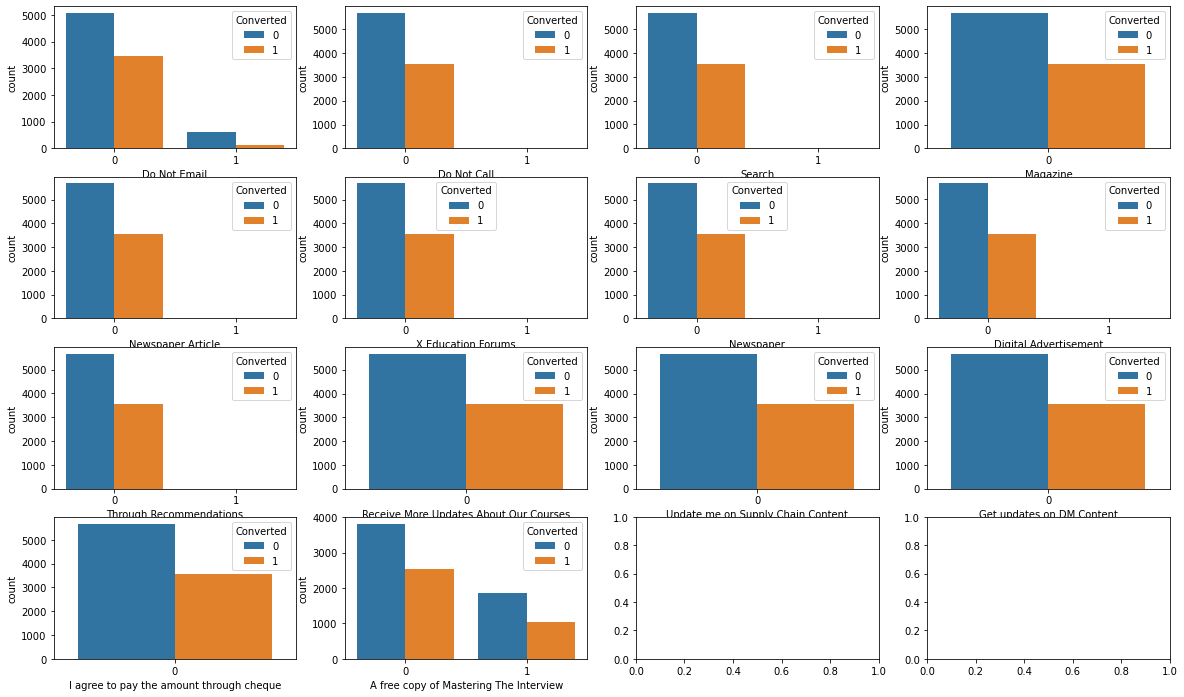

In [18]:
# making countplot for categorical columns with hue Converted

fig, axs = plt.subplots(4,4,figsize = (20,12))
sns.countplot(x = "Do Not Email", hue = "Converted", data = leads, ax = axs[0,0])
sns.countplot(x = "Do Not Call", hue = "Converted", data = leads, ax = axs[0,1])
sns.countplot(x = "Search", hue = "Converted", data = leads, ax = axs[0,2])
sns.countplot(x = "Magazine", hue = "Converted", data = leads, ax = axs[0,3])
sns.countplot(x = "Newspaper Article", hue = "Converted", data = leads, ax = axs[1,0])
sns.countplot(x = "X Education Forums", hue = "Converted", data = leads, ax = axs[1,1])
sns.countplot(x = "Newspaper", hue = "Converted", data = leads, ax = axs[1,2])
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = leads, ax = axs[1,3])
sns.countplot(x = "Through Recommendations", hue = "Converted", data = leads, ax = axs[2,0])
sns.countplot(x = "Receive More Updates About Our Courses", hue = "Converted", data = leads, ax = axs[2,1])
sns.countplot(x = "Update me on Supply Chain Content", hue = "Converted", data =leads, ax = axs[2,2])
sns.countplot(x = "Get updates on DM Content", hue = "Converted", data = leads, ax = axs[2,3])
sns.countplot(x = "I agree to pay the amount through cheque", hue = "Converted", data = leads, ax = axs[3,0])
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = leads, ax = axs[3,1])
plt.show()

In [19]:
# Except 'A free copy of Mastering The Interview' and 'Do Not Email' other columns does not give any insights as 
# most of them have maximum values 0 or 'NO'. 'A free copy of Mastering also is data generated by sales so can be dropped.

cols_to_drop = (['Do Not Call', 'Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview'])

In [20]:
leads.drop(cols_to_drop, axis=1, inplace=True)

In [21]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,What matters most to you in choosing a course,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,NaN,Unemployed,Better Career Prospects,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,India,Unemployed,Better Career Prospects,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,India,Student,Better Career Prospects,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,India,Unemployed,Better Career Prospects,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,India,Unemployed,Better Career Prospects,Modified


In [22]:
# Check the Null values again
round(100 * leads.isnull().sum() / len(leads.index),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Last Notable Activity                             0.00
dtype: float64

#### Lead Source Column

In [23]:
leads['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [24]:
# We have only 36 NaN values so we can impute it with Google as it has the highest no. of values with big margin
leads['Lead Source'] = leads['Lead Source'].replace(np.nan, 'Google')

# Replace google with Google as both are same
leads['Lead Source'] = leads['Lead Source'].replace('google', 'Google')

# Replace Low Frequency values with Others are they are too less.
leads['Lead Source'] = leads['Lead Source'].replace(['bing', 'Click2call', 'Social Media', 'Live Chat', 'Press_Release',
                                                    'Pay per Click Ads','blog','WeLearn', 'welearnblog_Home','youtubechannel',          
                                                    'testone','NC_EDM'], 'Others')

# Chech the value_counts again
leads['Lead Source'].value_counts()

Google              2909
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Facebook              55
Others                23
Name: Lead Source, dtype: int64

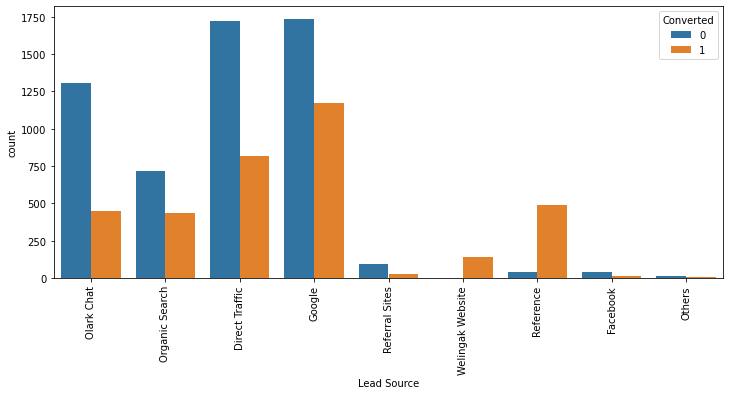

In [25]:
plt.figure(figsize=(12,5))
s1=sns.countplot(x='Lead Source', hue='Converted' , data = leads)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [26]:
# Check the Null values again
round(100 * leads.isnull().sum() / len(leads.index),2)

Lead Origin                                       0.00
Lead Source                                       0.00
Do Not Email                                      0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Last Notable Activity                             0.00
dtype: float64

#### Last Activity Columns

In [27]:
leads['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [28]:
# Impute NaN with 'Email opened' as it has max value counts and NaN value is too low.
leads['Last Activity'] = leads['Last Activity'].replace(np.nan, 'Email Opened')

# Replace Low frequency counts with Others
leads['Last Activity'] = leads['Last Activity'].replace(['Unreachable','Unsubscribed', 'Had a Phone Conversation', 
                                                       'Approached upfront', 'View in browser link Clicked',       
                                                        'Email Marked Spam', 'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')
# Check the value_counts again
leads['Last Activity'].value_counts(dropna=False)

Email Opened                 3540
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Others                        205
Form Submitted on Website     116
Name: Last Activity, dtype: int64

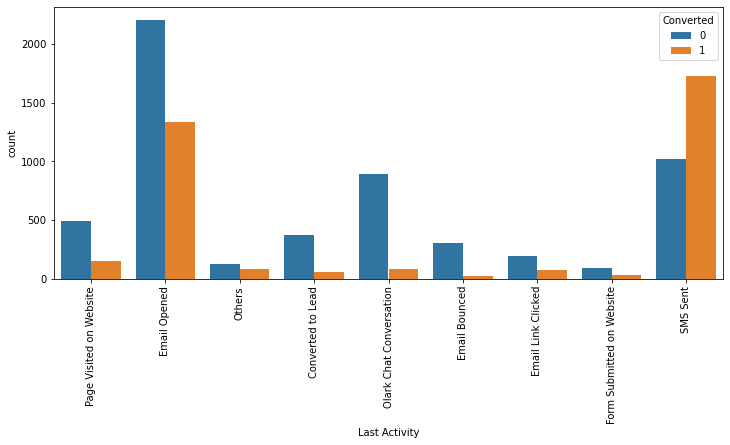

In [29]:
plt.figure(figsize=(12,5))
s1=sns.countplot(x='Last Activity', hue='Converted' , data = leads)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [30]:
# We can drop this column as 'Email Opened' has highest leads generated but conversion rate is not good. Only 'SMS sent' has good conversion rate

In [31]:
leads.drop('Last Activity', axis=1, inplace=True)

In [32]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,What is your current occupation,What matters most to you in choosing a course,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,NaN,Unemployed,Better Career Prospects,Modified
1,API,Organic Search,0,0,5.0,674,2.5,India,Unemployed,Better Career Prospects,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,India,Student,Better Career Prospects,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,India,Unemployed,Better Career Prospects,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,India,Unemployed,Better Career Prospects,Modified


#### Country Column

In [33]:
leads['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

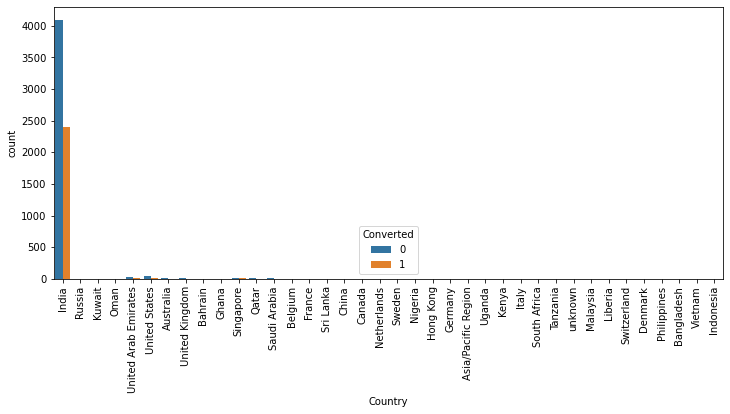

In [34]:
plt.figure(figsize=[12,5])
sns.countplot(x='Country', data=leads, hue='Converted')
plt.xticks(rotation=90)
plt.show()

In [35]:
leads.Country.value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [36]:
# Since most of the countries are India, we can drop the column

leads.drop('Country', axis=1, inplace=True)
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation,What matters most to you in choosing a course,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Unemployed,Better Career Prospects,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Unemployed,Better Career Prospects,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Student,Better Career Prospects,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unemployed,Better Career Prospects,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Unemployed,Better Career Prospects,Modified


#### What is your current occupation 

In [37]:
leads['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [38]:
# We can impute Nan values with 'Information Unavailable' as there is no information about these occupation

leads['What is your current occupation'] = leads['What is your current occupation'].replace(np.nan, 'Info Unavailable')

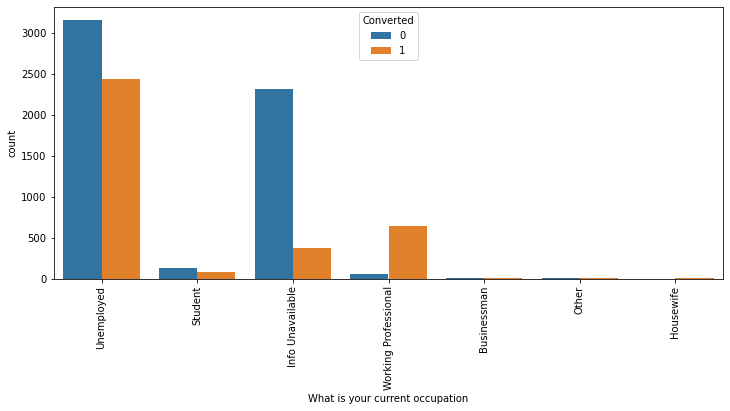

In [39]:
# Make a countplot to see conversion rate
plt.figure(figsize=[12,5])
sns.countplot(x='What is your current occupation', data=leads, hue='Converted')
plt.xticks(rotation=90)
plt.show()

#### What matters most to you in choosing a course

In [40]:
leads['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [41]:
# NaN can be replaced with Better Career Prospects

leads['What matters most to you in choosing a course'] = leads['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

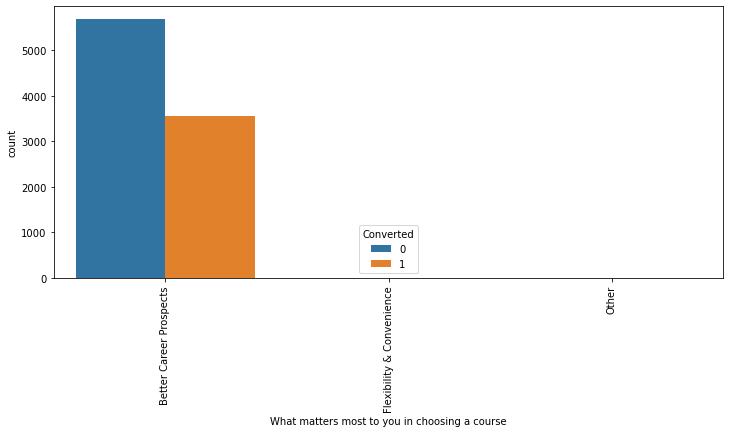

In [42]:
# Make a countplot to see conversion rate
plt.figure(figsize=[12,5])
sns.countplot(x='What matters most to you in choosing a course', data=leads, hue='Converted')
plt.xticks(rotation=90)
plt.show()

In [43]:
# We can drop the columns as it does not give any insight

leads.drop('What matters most to you in choosing a course', axis=1, inplace=True)

leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Unemployed,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Unemployed,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Student,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unemployed,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Unemployed,Modified


#### Last Notable Activity

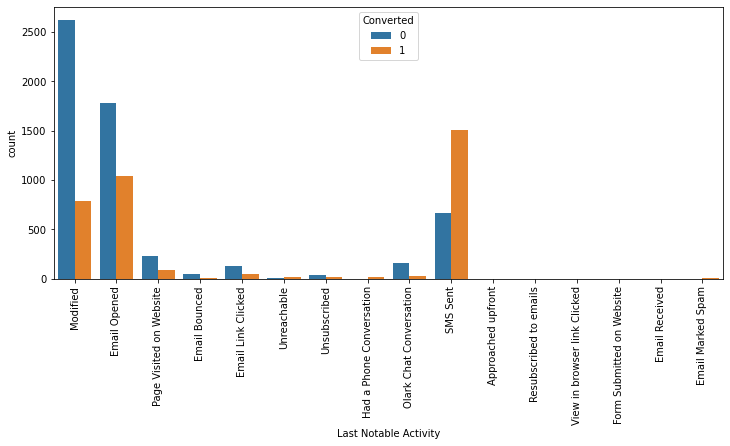

In [44]:
# Make a countplot to see conversion rate
plt.figure(figsize=[12,5])
sns.countplot(x='Last Notable Activity', data=leads, hue='Converted')
plt.xticks(rotation=90)
plt.show()

In [45]:
# Email opened and sms sent have good conversion rates but we can drop the columns as it is data given by the sales team after the leads have been provided

In [46]:
leads.drop('Last Notable Activity', axis=1, inplace=True)

In [47]:
# Check the Null values again
round(100 * leads.isnull().sum() / len(leads.index),2)

Lead Origin                        0.00
Lead Source                        0.00
Do Not Email                       0.00
Converted                          0.00
TotalVisits                        1.48
Total Time Spent on Website        0.00
Page Views Per Visit               1.48
What is your current occupation    0.00
dtype: float64

In [48]:
# We can drop rows which have Null Values < 2%

leads.dropna(inplace=True)

In [49]:
leads.shape

(9103, 8)

In [50]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      9103 non-null   object 
 1   Lead Source                      9103 non-null   object 
 2   Do Not Email                     9103 non-null   int64  
 3   Converted                        9103 non-null   int64  
 4   TotalVisits                      9103 non-null   float64
 5   Total Time Spent on Website      9103 non-null   int64  
 6   Page Views Per Visit             9103 non-null   float64
 7   What is your current occupation  9103 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 640.1+ KB


### Check the Conversion Rate

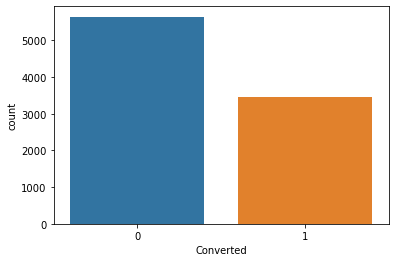

In [51]:
sns.countplot(leads.Converted)
plt.show()

In [52]:
# Calculate the Conversion Rate
round(sum(leads.Converted)/len(leads.Converted.index)*100,2)


38.02

#### Only 38% of the leads are Converted which os very low.

## Outliers Treatment

<AxesSubplot:ylabel='TotalVisits'>

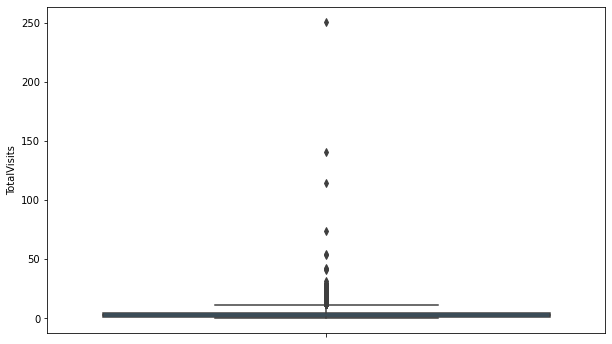

In [53]:
# Check for outliers in Total Visits column
plt.figure(figsize=[10,6])
sns.boxplot(y='TotalVisits', data=leads)

In [54]:
# We can clearly see outliers, let's check the description of the spread
leads.TotalVisits.describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [55]:
# Cehck the percentile for total visits spread
leads.TotalVisits.describe(percentiles=[.05,.25,.5,.75,.9,.95,.99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

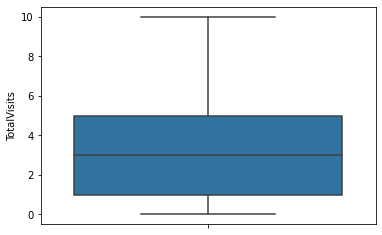

In [56]:
# Capping the outliers to 0%-95% value for analysis
percentiles = leads['TotalVisits'].quantile([0.05,0.95]).values
leads['TotalVisits'][leads['TotalVisits'] <= percentiles[0]] = percentiles[0]
leads['TotalVisits'][leads['TotalVisits'] >= percentiles[1]] = percentiles[1]

#visualizing variable after outlier treatment
sns.boxplot(y=leads['TotalVisits'])
plt.show()

### Total Time Spent on Website

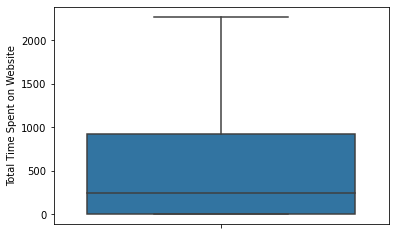

In [57]:
sns.boxplot(y='Total Time Spent on Website', data=leads)
plt.show()

In [58]:
# No outliers.

### Page Views per Visit

In [59]:
leads['Page Views Per Visit'].describe(percentiles=[.05,.25,.5,.75,.9,.95,.99])

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

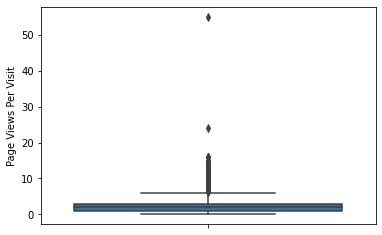

In [60]:
sns.boxplot(y='Page Views Per Visit', data=leads)
plt.show()

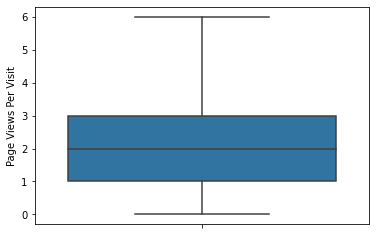

In [61]:
# Capping the outliers to 0%-95% value for analysis
percentiles = leads['Page Views Per Visit'].quantile([0.05,0.95]).values
leads['Page Views Per Visit'][leads['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
leads['Page Views Per Visit'][leads['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

#visualizing variable after outlier treatment
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

# Step 4 - EDA

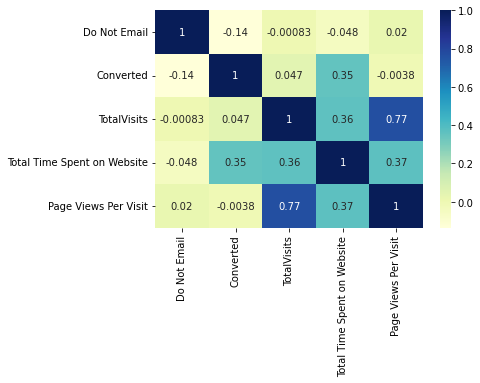

In [62]:
# Creating heatmap to see correlation between the numerical variables
sns.heatmap(leads.corr(), annot=True, cmap='YlGnBu')
plt.show()

# Step 4 - Data Preparation

## Create dummy variables for Categorical Columns

In [63]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      9103 non-null   object 
 1   Lead Source                      9103 non-null   object 
 2   Do Not Email                     9103 non-null   int64  
 3   Converted                        9103 non-null   int64  
 4   TotalVisits                      9103 non-null   float64
 5   Total Time Spent on Website      9103 non-null   int64  
 6   Page Views Per Visit             9103 non-null   float64
 7   What is your current occupation  9103 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 640.1+ KB


In [64]:
# Creating dummy variables for Object types

dummy1 = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'What is your current occupation']], drop_first=True)

# Adding the results to the master dataframe
leads = pd.concat([leads, dummy1], axis=1)

In [65]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,What is your current occupation_Housewife,What is your current occupation_Info Unavailable,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,API,Olark Chat,0,0,0.0,0,0.0,Unemployed,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,API,Organic Search,0,0,5.0,674,2.5,Unemployed,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Student,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unemployed,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Unemployed,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [66]:
# Dropping the columns whose dummy have been created
leads.drop(['Lead Origin', 'Lead Source', 'What is your current occupation'], axis=1, inplace=True)

In [67]:
leads.shape

(9103, 22)

# Step 5 - Train Test Split

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X = leads.drop('Converted', axis=1)
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,What is your current occupation_Housewife,What is your current occupation_Info Unavailable,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,0,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [70]:
y=leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [71]:
# train-test-split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7, random_state=100)

In [72]:
X_train.shape

(6372, 21)

In [73]:
X_test.shape

(2731, 21)

In [74]:
leads.shape

(9103, 22)

# Step 6 - Feature Scaling

In [75]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

In [76]:
# Fit and Transform the variables

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,What is your current occupation_Housewife,What is your current occupation_Info Unavailable,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
7962,0,-0.068258,1.476324,-0.423364,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
5520,0,1.362470,-0.771066,2.083179,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1962,0,0.647106,-0.571257,0.133646,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1566,0,2.435517,1.393834,0.690655,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
9170,0,-1.141305,-0.881052,-1.258878,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [77]:
leads_ = (sum(leads['Converted'])/len(leads['Converted'].index))*100
leads_

38.02043282434362

## We have 38% leads which are converted positively.

# Step 7 - Looking at the correlations

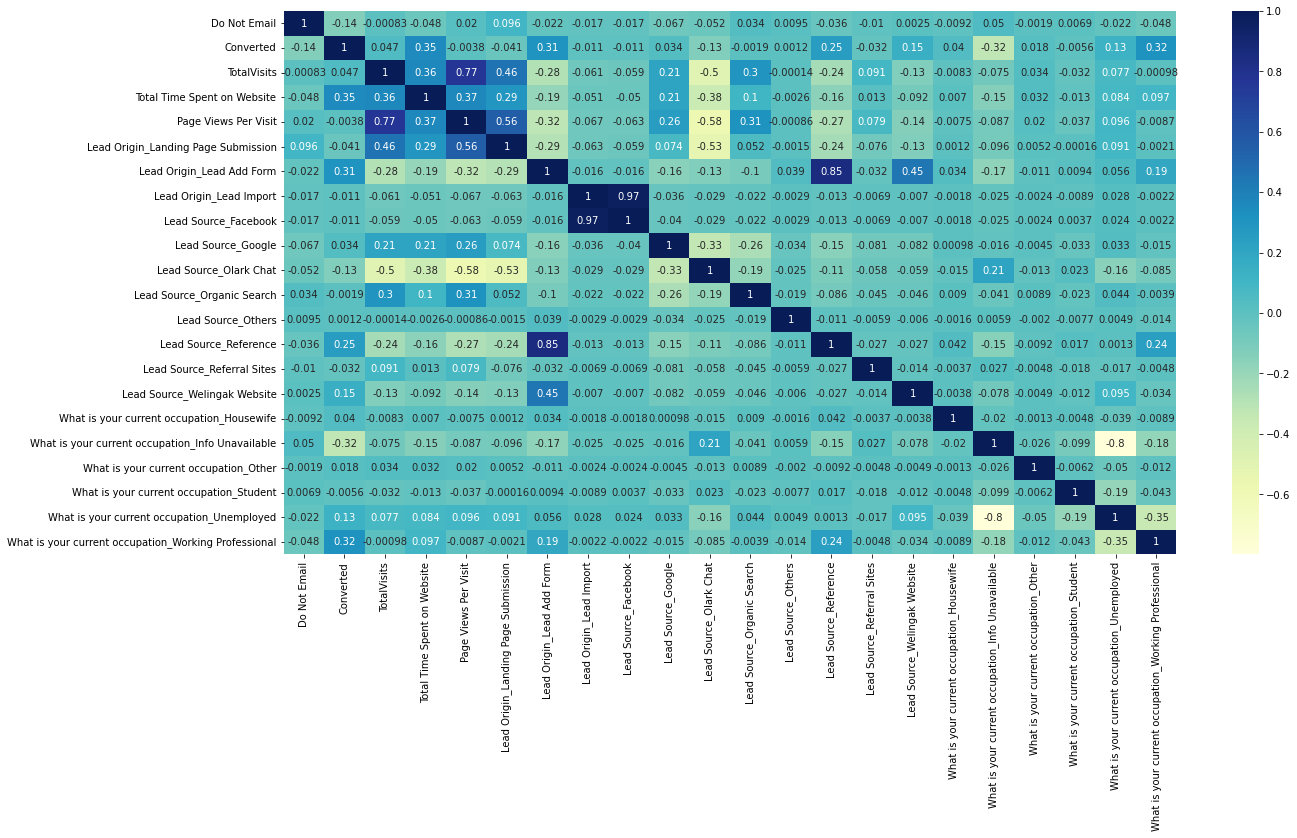

In [78]:
plt.figure(figsize=[20,10])
sns.heatmap(leads.corr(), annot=True, cmap='YlGnBu')
plt.show()

# Step 8 - Model Building

In [79]:
import statsmodels.api as sm

## Model - 1

In [80]:
logm1 = sm.GLM(y_train, sm.add_constant(X_train), family=sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6350
Model Family:                Binomial   Df Model:                           21
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2842.7
Date:                Tue, 15 Nov 2022   Deviance:                       5685.4
Time:                        11:52:55   Pearson chi2:                 6.40e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3531
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8720      0.994     -0.877      0.380      -2.820       1.076
Do Not Email                                            -1.3078      0.161     -8.145      0.000      -1.623      -0.993
TotalVisits                                              0.2987      0.050      5.941      0.000       0.200       0.397
Total Time Spent on Website                              1.0936      0.039     28.212      0.000       1.018       1.170
Page Views Per Visit                                    -0.1228      0.058     -2.123      0.034      -0.236      -0.009
Lead Origin_Landing Page Submission                     -0.0474      0.096     -0.495      0.621      -0.235       0.140
Lead Origin_Lead Add Form                                4.5119      0.782      5.768      0.000       2.979       6.045
Lead Origin_Lead Import                                  0.8897      1.582      0.562      0.574      -2.211       3.990
Lead Source_Facebook                                     0.3702      1.580      0.234      0.815      -2.726       3.467
Lead Source_Google                                       0.2439      0.092      2.655      0.008       0.064       0.424
Lead Source_Olark Chat                                   1.2252      0.148      8.303      0.000       0.936       1.514
Lead Source_Organic Search                               0.0669      0.120      0.555      0.579      -0.169       0.303
Lead Source_Others                                      -0.1515      0.725     -0.209      0.835      -1.573       1.270
Lead Source_Reference                                   -0.4496      0.809     -0.555      0.579      -2.036       1.137
Lead Source_Referral Sites                              -0.4604      0.342     -1.347      0.178      -1.130       0.209
Lead Source_Welingak Website                             1.6014      1.058      1.514      0.130      -0.472       3.675
What is your current occupation_Housewife               22.6679   1.59e+04      0.001      0.999   -3.12e+04    3.12e+04
What is your current occupation_Info Unavailable        -1.3267      0.993     -1.335      0.182      -3.274       0.620
What is your current occupation_Other                   -0.0977      1.176     -0.083      0.934      -2.403       2.208
What is your current occupation_Student                 -0.1290      1.014     -0.127      0.899      -2.116       1.858
What is your current occupation_Unemployed              -0.0083      0.991     -0.008      0.993      -1.951       1.935
What is your current occupation_Working Professional     2.5145      1.006      2.499      0.012       0.543       4.486
==========================================================

# Step 9 - Model selection using RFE

In [81]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [82]:
from sklearn.feature_selection import RFE

In [83]:
rfe = RFE(logreg, n_features_to_select=17) # Selecting top 17 features usinf RFE
rfe = rfe.fit(X_train, y_train)

In [84]:
rfe.support_

array([ True,  True,  True, False, False,  True,  True,  True,  True,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [85]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 2),
 ('Lead Origin_Landing Page Submission', False, 3),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 4),
 ('Lead Source_Others', False, 5),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Welingak Website', True, 1),
 ('What is your current occupation_Housewife', True, 1),
 ('What is your current occupation_Info Unavailable', True, 1),
 ('What is your current occupation_Other', True, 1),
 ('What is your current occupation_Student', True, 1),
 ('What is your current occupation_Unemployed', True, 1),
 ('What is your current occupation_Working Professional', True, 1)]

In [86]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website',
       'What is your current occupation_Housewife',
       'What is your current occupation_Info Unavailable',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [87]:
X_train.columns[~rfe.support_]

Index(['Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Source_Organic Search', 'Lead Source_Others'],
      dtype='object')

### Assessing the model using statsmodel

## Model - 2


In [88]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6354
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2845.6
Date:                Tue, 15 Nov 2022   Deviance:                       5691.2
Time:                        11:52:56   Pearson chi2:                 6.41e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3525
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8843      0.993     -0.890      0.373      -2.831       1.063
Do Not Email                                            -1.3095      0.160     -8.161      0.000      -1.624      -0.995
TotalVisits                                              0.2386      0.041      5.796      0.000       0.158       0.319
Total Time Spent on Website                              1.0928      0.039     28.201      0.000       1.017       1.169
Lead Origin_Lead Add Form                                4.6232      0.768      6.017      0.000       3.117       6.129
Lead Origin_Lead Import                                  1.0721      1.567      0.684      0.494      -2.000       4.144
Lead Source_Facebook                                     0.3080      1.567      0.197      0.844      -2.763       3.379
Lead Source_Google                                       0.2343      0.076      3.070      0.002       0.085       0.384
Lead Source_Olark Chat                                   1.3535      0.119     11.331      0.000       1.119       1.588
Lead Source_Reference                                   -0.4283      0.796     -0.538      0.590      -1.988       1.131
Lead Source_Referral Sites                              -0.4672      0.332     -1.407      0.159      -1.118       0.183
Lead Source_Welingak Website                             1.6234      1.048      1.550      0.121      -0.430       3.677
What is your current occupation_Housewife               22.6844   1.59e+04      0.001      0.999   -3.11e+04    3.11e+04
What is your current occupation_Info Unavailable        -1.3557      0.995     -1.363      0.173      -3.306       0.594
What is your current occupation_Other                   -0.1100      1.176     -0.094      0.925      -2.415       2.195
What is your current occupation_Student                 -0.1643      1.015     -0.162      0.871      -2.154       1.825
What is your current occupation_Unemployed              -0.0441      0.993     -0.044      0.965      -1.990       1.902
What is your current occupation_Working Professional     2.4689      1.007      2.451      0.014       0.494       4.443
========================================================================================================================
"""

In [89]:
# Since p value of What is your current occupation_Housewife is very high, we need to drop it.

col = col.drop('What is your current occupation_Housewife',1)

## Model - 3 

In [90]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6355
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2848.4
Date:                Tue, 15 Nov 2022   Deviance:                       5696.9
Time:                        11:52:56   Pearson chi2:                 6.41e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3519
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5008      0.732      0.684      0.494      -0.934       1.936
Do Not Email                                            -1.3099      0.160     -8.164      0.000      -1.624      -0.995
TotalVisits                                              0.2357      0.041      5.730      0.000       0.155       0.316
Total Time Spent on Website                              1.0930      0.039     28.217      0.000       1.017       1.169
Lead Origin_Lead Add Form                                4.6189      0.768      6.012      0.000       3.113       6.125
Lead Origin_Lead Import                                  1.0681      1.567      0.682      0.496      -2.004       4.140
Lead Source_Facebook                                     0.3074      1.566      0.196      0.844      -2.763       3.378
Lead Source_Google                                       0.2340      0.076      3.068      0.002       0.084       0.383
Lead Source_Olark Chat                                   1.3470      0.119     11.286      0.000       1.113       1.581
Lead Source_Reference                                   -0.4312      0.796     -0.542      0.588      -1.991       1.129
Lead Source_Referral Sites                              -0.4665      0.332     -1.405      0.160      -1.117       0.184
Lead Source_Welingak Website                             1.6230      1.048      1.549      0.121      -0.430       3.676
What is your current occupation_Info Unavailable        -2.7387      0.735     -3.726      0.000      -4.179      -1.298
What is your current occupation_Other                   -1.4925      0.966     -1.544      0.123      -3.387       0.402
What is your current occupation_Student                 -1.5474      0.762     -2.030      0.042      -3.041      -0.054
What is your current occupation_Unemployed              -1.4274      0.732     -1.950      0.051      -2.862       0.008
What is your current occupation_Working Professional     1.0852      0.752      1.444      0.149      -0.388       2.558
========================================================================================================================
"""

In [91]:
# P-value of Lead Source_Facebook is too high so we need to drop the column
col = col.drop('Lead Source_Facebook',1)

## Model - 4

In [92]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2848.5
Date:                Tue, 15 Nov 2022   Deviance:                       5696.9
Time:                        11:52:56   Pearson chi2:                 6.41e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3519
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5010      0.732      0.684      0.494      -0.934       1.936
Do Not Email                                            -1.3100      0.160     -8.165      0.000      -1.624      -0.996
TotalVisits                                              0.2357      0.041      5.730      0.000       0.155       0.316
Total Time Spent on Website                              1.0930      0.039     28.217      0.000       1.017       1.169
Lead Origin_Lead Add Form                                4.6190      0.768      6.012      0.000       3.113       6.125
Lead Origin_Lead Import                                  1.3623      0.447      3.045      0.002       0.485       2.239
Lead Source_Google                                       0.2335      0.076      3.063      0.002       0.084       0.383
Lead Source_Olark Chat                                   1.3466      0.119     11.285      0.000       1.113       1.580
Lead Source_Reference                                   -0.4317      0.796     -0.542      0.588      -1.991       1.128
Lead Source_Referral Sites                              -0.4667      0.332     -1.406      0.160      -1.117       0.184
Lead Source_Welingak Website                             1.6226      1.048      1.549      0.121      -0.430       3.676
What is your current occupation_Info Unavailable        -2.7386      0.735     -3.726      0.000      -4.179      -1.298
What is your current occupation_Other                   -1.4925      0.966     -1.544      0.122      -3.387       0.402
What is your current occupation_Student                 -1.5446      0.762     -2.027      0.043      -3.038      -0.051
What is your current occupation_Unemployed              -1.4273      0.732     -1.949      0.051      -2.862       0.008
What is your current occupation_Working Professional     1.0853      0.751      1.444      0.149      -0.388       2.558
========================================================================================================================
"""

In [93]:
# P-value of Lead Source_Reference is too high so we need to drop it
col = col.drop('Lead Source_Reference', 1)

## Model -5

In [94]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6357
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2848.6
Date:                Tue, 15 Nov 2022   Deviance:                       5697.3
Time:                        11:52:56   Pearson chi2:                 6.41e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3519
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4982      0.732      0.680      0.496      -0.937       1.934
Do Not Email                                            -1.3020      0.159     -8.172      0.000      -1.614      -0.990
TotalVisits                                              0.2358      0.041      5.734      0.000       0.155       0.316
Total Time Spent on Website                              1.0929      0.039     28.218      0.000       1.017       1.169
Lead Origin_Lead Add Form                                4.2266      0.230     18.357      0.000       3.775       4.678
Lead Origin_Lead Import                                  1.3643      0.447      3.050      0.002       0.488       2.241
Lead Source_Google                                       0.2373      0.076      3.128      0.002       0.089       0.386
Lead Source_Olark Chat                                   1.3487      0.119     11.308      0.000       1.115       1.582
Lead Source_Referral Sites                              -0.4648      0.332     -1.400      0.161      -1.115       0.186
Lead Source_Welingak Website                             2.0147      0.749      2.690      0.007       0.547       3.483
What is your current occupation_Info Unavailable        -2.7381      0.735     -3.723      0.000      -4.179      -1.297
What is your current occupation_Other                   -1.4916      0.967     -1.543      0.123      -3.386       0.403
What is your current occupation_Student                 -1.5439      0.762     -2.025      0.043      -3.038      -0.050
What is your current occupation_Unemployed              -1.4266      0.732     -1.948      0.051      -2.862       0.009
What is your current occupation_Working Professional     1.0847      0.752      1.443      0.149      -0.389       2.558
========================================================================================================================
"""

In [95]:
#p-value of What is your current occupation_Other is too high so we need to drop it
col = col.drop('What is your current occupation_Other',1)

## Model - 6

In [96]:
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6358
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2849.9
Date:                Tue, 15 Nov 2022   Deviance:                       5699.7
Time:                        11:52:56   Pearson chi2:                 6.41e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3516
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3077      0.470     -0.655      0.513      -1.229       0.613
Do Not Email                                            -1.3055      0.159     -8.185      0.000      -1.618      -0.993
TotalVisits                                              0.2351      0.041      5.716      0.000       0.154       0.316
Total Time Spent on Website                              1.0916      0.039     28.203      0.000       1.016       1.167
Lead Origin_Lead Add Form                                4.2277      0.230     18.365      0.000       3.777       4.679
Lead Origin_Lead Import                                  1.3622      0.447      3.045      0.002       0.485       2.239
Lead Source_Google                                       0.2389      0.076      3.149      0.002       0.090       0.388
Lead Source_Olark Chat                                   1.3470      0.119     11.298      0.000       1.113       1.581
Lead Source_Referral Sites                              -0.4638      0.332     -1.398      0.162      -1.114       0.187
Lead Source_Welingak Website                             2.0125      0.749      2.687      0.007       0.545       3.480
What is your current occupation_Info Unavailable        -1.9319      0.474     -4.076      0.000      -2.861      -1.003
What is your current occupation_Student                 -0.7380      0.515     -1.433      0.152      -1.747       0.271
What is your current occupation_Unemployed              -0.6207      0.470     -1.322      0.186      -1.541       0.300
What is your current occupation_Working Professional     1.8904      0.499      3.785      0.000       0.911       2.869
========================================================================================================================
"""

In [97]:
#p-value of What is your current occupation_Unemployed is too high so we can drop it
col = col.drop('What is your current occupation_Unemployed',1)

## Model - 7

In [98]:
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6359
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2850.8
Date:                Tue, 15 Nov 2022   Deviance:                       5701.5
Time:                        11:52:56   Pearson chi2:                 6.41e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3514
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9236      0.060    -15.406      0.000      -1.041      -0.806
Do Not Email                                            -1.3059      0.159     -8.197      0.000      -1.618      -0.994
TotalVisits                                              0.2365      0.041      5.753      0.000       0.156       0.317
Total Time Spent on Website                              1.0923      0.039     28.225      0.000       1.016       1.168
Lead Origin_Lead Add Form                                4.2301      0.230     18.378      0.000       3.779       4.681
Lead Origin_Lead Import                                  1.3600      0.447      3.040      0.002       0.483       2.237
Lead Source_Google                                       0.2370      0.076      3.126      0.002       0.088       0.386
Lead Source_Olark Chat                                   1.3476      0.119     11.303      0.000       1.114       1.581
Lead Source_Referral Sites                              -0.4688      0.332     -1.413      0.158      -1.119       0.182
Lead Source_Welingak Website                             2.0079      0.749      2.681      0.007       0.540       3.476
What is your current occupation_Info Unavailable        -1.3155      0.084    -15.700      0.000      -1.480      -1.151
What is your current occupation_Student                 -0.1216      0.218     -0.557      0.577      -0.549       0.306
What is your current occupation_Working Professional     2.5070      0.178     14.052      0.000       2.157       2.857
========================================================================================================================
"""

In [99]:
#p-value of What is your current occupation_Student is too high so we can drop it
col = col.drop('What is your current occupation_Student',1)

## Model - 8

In [100]:
X_train_sm = sm.add_constant(X_train[col])
logm8 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6360
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2850.9
Date:                Tue, 15 Nov 2022   Deviance:                       5701.8
Time:                        11:52:56   Pearson chi2:                 6.41e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3514
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9278      0.060    -15.591      0.000      -1.044      -0.811
Do Not Email                                            -1.3060      0.159     -8.199      0.000      -1.618      -0.994
TotalVisits                                              0.2367      0.041      5.758      0.000       0.156       0.317
Total Time Spent on Website                              1.0926      0.039     28.233      0.000       1.017       1.168
Lead Origin_Lead Add Form                                4.2293      0.230     18.375      0.000       3.778       4.680
Lead Origin_Lead Import                                  1.3642      0.447      3.050      0.002       0.488       2.241
Lead Source_Google                                       0.2381      0.076      3.142      0.002       0.090       0.387
Lead Source_Olark Chat                                   1.3465      0.119     11.298      0.000       1.113       1.580
Lead Source_Referral Sites                              -0.4660      0.332     -1.404      0.160      -1.116       0.184
Lead Source_Welingak Website                             2.0122      0.749      2.687      0.007       0.544       3.480
What is your current occupation_Info Unavailable        -1.3115      0.083    -15.709      0.000      -1.475      -1.148
What is your current occupation_Working Professional     2.5109      0.178     14.084      0.000       2.162       2.860
========================================================================================================================
"""

In [101]:
#p-value of Lead Source_Referral Sites is too high so we can drop it
col = col.drop('Lead Source_Referral Sites',1)

## Model - 9

In [102]:
X_train_sm = sm.add_constant(X_train[col])
logm9 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm9.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6361
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2852.0
Date:                Tue, 15 Nov 2022   Deviance:                       5703.9
Time:                        11:52:56   Pearson chi2:                 6.41e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3512
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9389      0.059    -15.895      0.000      -1.055      -0.823
Do Not Email                                            -1.3019      0.159     -8.174      0.000      -1.614      -0.990
TotalVisits                                              0.2333      0.041      5.692      0.000       0.153       0.314
Total Time Spent on Website                              1.0938      0.039     28.265      0.000       1.018       1.170
Lead Origin_Lead Add Form                                4.2362      0.230     18.410      0.000       3.785       4.687
Lead Origin_Lead Import                                  1.3724      0.447      3.068      0.002       0.496       2.249
Lead Source_Google                                       0.2501      0.075      3.318      0.001       0.102       0.398
Lead Source_Olark Chat                                   1.3558      0.119     11.391      0.000       1.123       1.589
Lead Source_Welingak Website                             2.0124      0.749      2.687      0.007       0.545       3.480
What is your current occupation_Info Unavailable        -1.3143      0.083    -15.751      0.000      -1.478      -1.151
What is your current occupation_Working Professional     2.5137      0.178     14.093      0.000       2.164       2.863
========================================================================================================================
"""

### P values seems fine for all the features now.
### Let's check the VIF now

## VIF

In [103]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Lead Source_Olark Chat,1.63
3,Lead Origin_Lead Add Form,1.55
1,TotalVisits,1.52
8,What is your current occupation_Info Unavailable,1.38
7,Lead Source_Welingak Website,1.32
2,Total Time Spent on Website,1.29
5,Lead Source_Google,1.22
9,What is your current occupation_Working Profes...,1.13
0,Do Not Email,1.04
4,Lead Origin_Lead Import,1.01


#### VIF for all the features are less than 5 so it seems a good model

# Step 10 - Making predection on train set

In [104]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[0:10]

7962    0.713021
5520    0.187806
1962    0.238201
1566    0.980502
9170    0.307239
5097    0.106468
8954    0.257486
309     0.274064
5519    0.106468
1050    0.606268
dtype: float64

In [105]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[0:10]

array([0.71302087, 0.18780634, 0.2382008 , 0.98050247, 0.30723913,
       0.10646766, 0.25748646, 0.27406437, 0.10646766, 0.60626845])

In [106]:
y_train_pred_final = pd.DataFrame({'Converted': y_train.values, 'Converted_Prob': y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,0,0.713021,7962
1,0,0.187806,5520
2,0,0.238201,1962
3,1,0.980502,1566
4,0,0.307239,9170


In [107]:
# Create a Predicted columns and enter the predicted values acc to probability.

y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > .5 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted
0,0,0.713021,7962,1
1,0,0.187806,5520,0
2,0,0.238201,1962,0
3,1,0.980502,1566,1
4,0,0.307239,9170,0


# Step - 11 : Check all the metrics like accuracy, senstivity, specificity etc

In [108]:
from sklearn import metrics

In [109]:
# Build the Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
confusion

array([[3534,  419],
       [ 858, 1561]], dtype=int64)

In [110]:
# Check the overall accuracy of the model
accuracy = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)
round(accuracy,2)

0.8

#### We have an accuray of around 80%.

In [111]:
# True Positive
TP = confusion[1,1]

# True Negative
TN = confusion[0,0]

# False Positive
FP = confusion[0,1]

# False Negative
FN = confusion[1,0]

###  Sensitivity of the model

In [112]:
senstivity = round(TP / (TP+FN),2)
senstivity

0.65

#### We have a senstivity of 64%

### Specificity of the model

In [113]:
specificity = round(TN / (TN+FP),2)
specificity

0.89

#### Specificity is around 90%

### False Positive Rate

In [114]:
False_positive_rate = round((FP/ float(TN+FP)),2)*100
False_positive_rate

11.0

### True Positive Rate

In [115]:
true_positive_rate = round((TP / float(TP+FP)),2)*100
true_positive_rate

79.0

### True Negative Rate

In [116]:
true_negative_rate = round((TN / float(TN+ FN)),2)*100
true_negative_rate

80.0

# Step 12 - Plotting the ROC curve

In [117]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [118]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

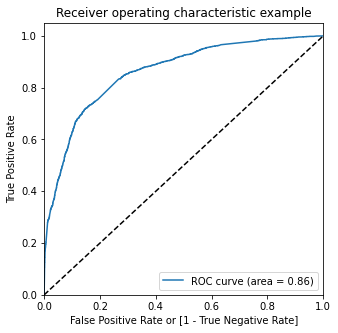

In [119]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

# Step 13 - Finding optimal cutoff point

In [120]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.713021,7962,1,1,1,1,1,1,1,1,1,0,0
1,0,0.187806,5520,0,1,1,0,0,0,0,0,0,0,0
2,0,0.238201,1962,0,1,1,1,0,0,0,0,0,0,0
3,1,0.980502,1566,1,1,1,1,1,1,1,1,1,1,1
4,0,0.307239,9170,0,1,1,1,1,0,0,0,0,0,0


In [121]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379630  1.000000  0.000000
0.1   0.1  0.516164  0.981811  0.231217
0.2   0.2  0.690521  0.903266  0.560334
0.3   0.3  0.767263  0.835056  0.725778
0.4   0.4  0.803202  0.705663  0.862889
0.5   0.5  0.799592  0.645308  0.894005
0.6   0.6  0.783271  0.566350  0.916013
0.7   0.7  0.763967  0.474576  0.941057
0.8   0.8  0.736503  0.357999  0.968125
0.9   0.9  0.691777  0.198016  0.993929


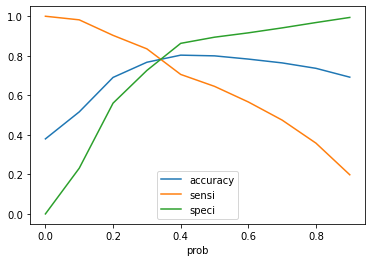

In [122]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [123]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.713021,7962,1,1,1,1,1,1,1,1,1,0,0,1
1,0,0.187806,5520,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.238201,1962,0,1,1,1,0,0,0,0,0,0,0,0
3,1,0.980502,1566,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.307239,9170,0,1,1,1,1,0,0,0,0,0,0,1


In [124]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_Prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_Prob','Prospect ID','final_predicted','Lead_Score']].head()

,Converted,Converted_Prob,Prospect ID,final_predicted,Lead_Score
0,0,0.713021,7962,1,71
1,0,0.187806,5520,0,19
2,0,0.238201,1962,0,24
3,1,0.980502,1566,1,98
4,0,0.307239,9170,1,31


In [125]:
# Let's check how many cases are correctly predicted based on the converted column.

checking_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_predicted']]
checking_df['final_predicted'].value_counts()

1    2020
0     399
Name: final_predicted, dtype: int64

In [162]:
# check the precentage of final_predicted conversions

round(checking_df['final_predicted'].value_counts()[1] / (checking_df['final_predicted'].value_counts()[0] + checking_df['final_predicted'].value_counts()[1]),2)

0.84

#### The percentage of final_predicted conversion comes out to be around 84% which seems like a good model.

## Now lets check all the metrics on the final_predicted

In [127]:
# Check the overall accuracy.
round(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted),2)

0.77

In [128]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2869, 1084],
       [ 399, 2020]], dtype=int64)

In [129]:
# true positive 
TP = confusion2[1,1] 

# true negatives
TN = confusion2[0,0] 

# false positives
FP = confusion2[0,1]

# false negatives
FN = confusion2[1,0] 

In [130]:
# Sensitivity of the model
round(TP / float(TP+FN),2)

0.84

In [131]:
# Specificity of the model
round(TN / float(TN+FP),2)

0.73

### We have sensitivity of 83% and specificity of 74%. So the model seems to be performing well on the training dataset

## PRECISION AND RECALL

In [132]:
from sklearn.metrics import precision_score, recall_score, precision_recall_curve

In [133]:
# PRECISION
round(precision_score(y_train_pred_final.Converted , y_train_pred_final.final_predicted),2)

0.65

In [134]:
# RECALL
round(recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted),2)

0.84

In [135]:
# Precision Recall curve
y_train_pred_final.Converted, y_train_pred_final.final_predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

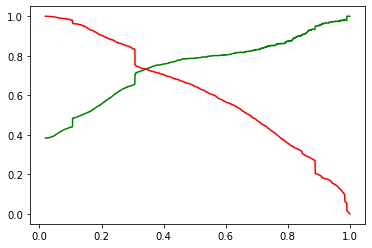

In [136]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# Step 14 - Predictions on the test set

In [137]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [138]:
X_test = X_test[col]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Welingak Website,What is your current occupation_Info Unavailable,What is your current occupation_Working Professional
3504,0,-0.068258,-0.103815,0,0,0,0,0,0,0
4050,0,-1.141305,-0.881052,1,0,0,0,0,0,0
7201,1,-0.425940,0.424120,0,0,0,0,0,0,0
1196,0,0.289424,-0.105648,0,0,0,0,0,0,0
8219,0,1.362470,-0.428274,0,0,0,0,0,0,0


In [139]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [140]:
y_test_pred = res.predict(X_test_sm)

In [141]:
y_test_pred[:10]

3504    0.255717
4050    0.887686
7201    0.132821
1196    0.271526
8219    0.251733
8747    0.106468
9048    0.273987
6524    0.196718
7693    0.047018
8187    0.887686
dtype: float64

In [142]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [143]:
# Let's see the head
y_pred_1.head()

,0
3504,0.255717
4050,0.887686
7201,0.132821
1196,0.271526
8219,0.251733


In [144]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [145]:
# Putting Prospect ID to index

y_test_df['Prospect ID'] = y_test_df.index

In [146]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [147]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [148]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3504,0.255717
1,1,4050,0.887686
2,0,7201,0.132821
3,0,1196,0.271526
4,1,8219,0.251733


In [149]:
# Renaming the column 

y_pred_final= y_pred_final.rename(columns={ 0 : 'Convert_Prob'})

In [150]:
# Rearranging the columns

y_pred_final = y_pred_final[['Prospect ID','Converted','Convert_Prob']]
y_pred_final['Lead_Score'] = y_pred_final.Convert_Prob.map( lambda x: round(x*100))

In [151]:
# Let's see the head of y_pred_final

y_pred_final.head()

,Prospect ID,Converted,Convert_Prob,Lead_Score
0,3504,0,0.255717,26
1,4050,1,0.887686,89
2,7201,0,0.132821,13
3,1196,0,0.271526,27
4,8219,1,0.251733,25


In [152]:
y_pred_final['final_predicted'] = y_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.3 else 0)

In [153]:
y_pred_final.head()

,Prospect ID,Converted,Convert_Prob,Lead_Score,final_predicted
0,3504,0,0.255717,26,0
1,4050,1,0.887686,89,1
2,7201,0,0.132821,13,0
3,1196,0,0.271526,27,0
4,8219,1,0.251733,25,0


In [154]:
# Let's check the overall accuracy.

round(metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted),2)

0.77

In [155]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1236,  453],
       [ 174,  868]], dtype=int64)

In [156]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [157]:
# Sensitivity of the model

round(TP / float(TP+FN),2)

0.83

In [158]:
# Specificity
round(TN / float(TN+FP),2)

0.73

### Precision and Recall for the Test set

In [159]:
round(precision_score(y_pred_final.Converted , y_pred_final.final_predicted),2)

0.66

In [160]:
round(recall_score(y_pred_final.Converted, y_pred_final.final_predicted),2)

0.83

#### Hence the precision and recall of the test set are close to that of the training set.

# FINAL CONCLUSIONS

## Train set
#### Accuracy: 77%
#### Sensitivity: 84%
#### Specificity: 73%
#### Precision: 65%
#### Recall: 84%

## Test set
#### Accuracy: 77%
#### Sensitivity: 83%
#### Specificity: 73%
#### Precision: 66%
#### Recall: 83%